### Spark Foundation Internship

### Omkar Dalvi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

C:\Users\omkar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop(['Id'],axis=1,inplace=True)

In [4]:
def data_inv(df):
    print('Total counts of rows:',df.shape[0]) 
    print('dataset variables: ',df.shape[1])   
    print('-'*20)
    print('dataset columns :\n') 
    print(df.columns)
    print('-'*20)
    print('data-type of each column: \n') # 
    print(df.dtypes)
    print('-'*20)
    print('Missing rows in each column: \n')
    c=df.isnull().sum()
    print(c[c>0])

In [5]:
data_inv(df)

Total counts of rows: 150
dataset variables:  5
--------------------
dataset columns :

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
--------------------
data-type of each column: 

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object
--------------------
Missing rows in each column: 

Series([], dtype: int64)


### Heat map to check the correlation

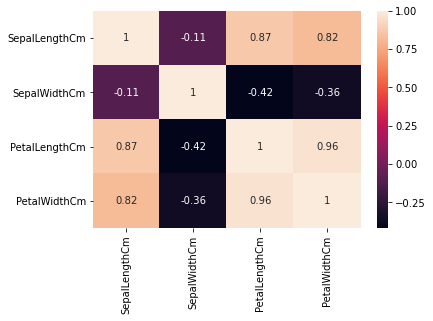

In [6]:
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.show()

### Spliting Dataset

In [7]:
X= df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

### Creating model

In [9]:
# Criterion = Gini index
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
dt.score(X_train,y_train) # Model overfitted

1.0

In [11]:
y_pred = dt.predict(X_test)

In [12]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [13]:
dt2 = DecisionTreeClassifier(max_depth=8)
dt2.fit(X_train,y_train)
y_pred = dt2.predict(X_test)
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [14]:
dt3 = DecisionTreeClassifier(min_samples_leaf=3)
dt3.fit(X_train,y_train)
y_pred = dt3.predict(X_test)
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [15]:
# Criterion = Entropy

dt4 = DecisionTreeClassifier(min_samples_leaf=20,criterion="entropy")
dt4.fit(X_train,y_train)
y_pred = dt4.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [16]:
dt5 = DecisionTreeClassifier(max_depth=8,criterion="entropy")
dt5.fit(X_train,y_train)
y_pred = dt5.predict(X_test)
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



### It seem like Crterion, max_depth,min_samples_leaf doesn't affect the the model performance that much.

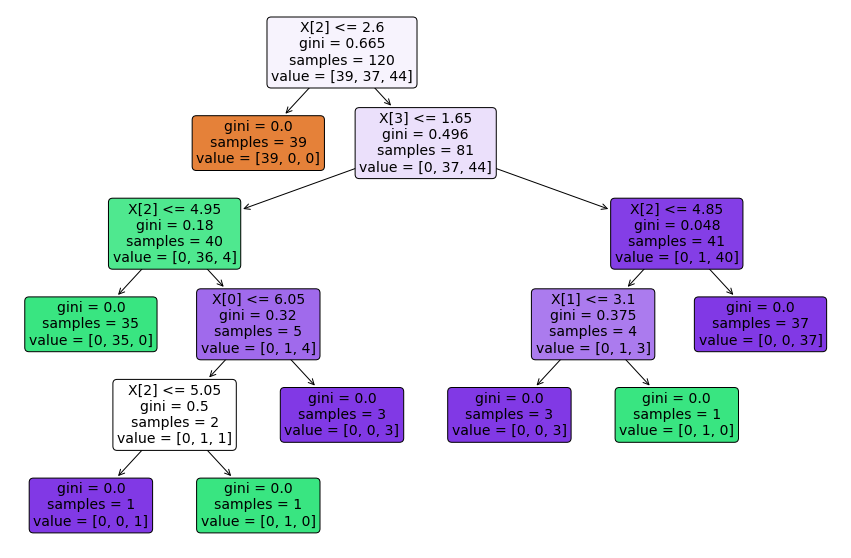

In [17]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt,
                 filled=True, 
                  rounded=True, 
                  fontsize=14)